Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


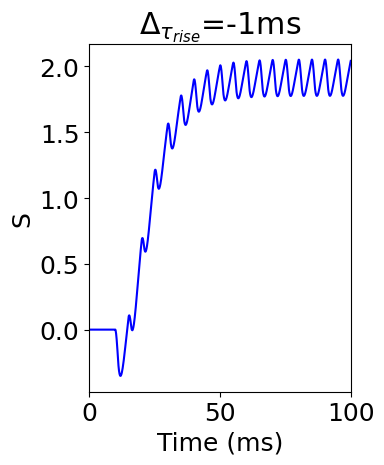

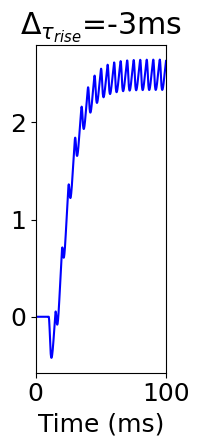

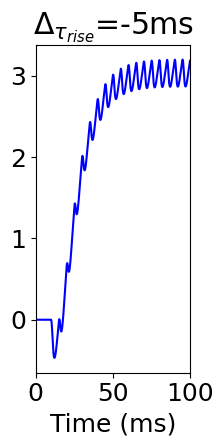

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d  
from scipy.signal import find_peaks

# GABA and AMPA biexponential
plt.rcParams.update({'font.size': 16})
delay=0
count=0
plt.figure(figsize=(16,10))
for a in [4]:#np.arange(1,10,10):
    for b in [11]:#np.arange(1,10,2):

        g_AMPA_ext_E = 50#100.08 #nS
        tau_1 = a #ms
        tau_2 = 6 #ms
        V_E = 0

        g_GABA_E = 1.25*100 #nS
        tau_1g = b #ms
        tau_2g= 2
        V_I = -70.


        C = 281 
        gL = 30 
        taum = C / gL
        EL = -70.6 
        VT = -50.4 
        DeltaT = 2 
        Vcut = VT + 5 * DeltaT

        # Pick an electrophysiological behaviour
        tauw, a, b, Vr = 144, 4, 0.0805, -70.6 # Regular spiking (as in the paper)
        #tauw,a,b,Vr=20*ms,4*nS,0.5*nA,VT+5*mV # Bursting
        #tauw,a,b,Vr=144*ms,2*C/(144*ms),0*nA,-70.6*mV # Fast spiking

        t = 100
        dt = 0.1
        N = round(t/dt)
        ttotal = np.arange(0,t,dt)

        ## signal
        tspks = np.arange(10,t,5)
        tspksi = [int(x/dt) for x in tspks]
        tspksf = [int((x+1)/dt) for x in tspks]
        amp=1
        syn = np.zeros_like(ttotal)
        for i in range(len(tspksi)):
            syn[tspksi[i]:tspksf[i]]=amp
        # syn[round(50/dt):round(51/dt)]=amp

        vm = EL
        w = b

        vmacum=[]

        s_AMPA_ext=0
        x_ampa=0

        s_GABA=0
        x_gaba=0
        Iacum=[]

        for i in range(N):
            
            if(i*dt < 20 or i*dt>120):
                I=0
            else:
                I=10000*0
                
            s_AMPA_ext =  s_AMPA_ext + dt*( ((tau_2/tau_1) ** (tau_1 / (tau_2 - tau_1))*x_ampa-s_AMPA_ext)/tau_1 ) 
            x_ampa = x_ampa + dt*(-x_ampa/tau_2 + syn[i])

            s_GABA =  s_GABA + dt*( ((tau_2g/tau_1g) ** (tau_1g / (tau_2g - tau_1g))*x_gaba-s_GABA)/tau_1g ) 
            x_gaba = x_gaba + dt*(-x_gaba/tau_2g + syn[i])

            I_GABA_rec = g_GABA_E * (vm - V_I) * s_GABA 
            I_AMPA_ext = g_AMPA_ext_E * (vm - V_E) * s_AMPA_ext 
        
            Iacum.append(s_GABA-s_AMPA_ext)
            vm = vm + dt*((gL*(EL - vm) + gL*DeltaT*np.exp((vm - VT)/DeltaT) + I - I_GABA_rec - I_AMPA_ext - w)/C)#
            w = w + dt*((a*(vm - EL) - w)/tauw)
            if(vm>Vcut):
                vmacum.append(20)
                vm=Vr
                w+=b
            else:
                vmacum.append(vm)
            

        count=count+1
        plt.subplot(1,3,count)
        #co=['r','b','g']
        
        plt.title(r'$\Delta_{\tau_{rise}}$='+str(tau_1-tau_1g)+'ms')
        plt.plot(ttotal,Iacum,c='b')
        plt.xlabel('Time (ms)')
        if(count==1):
            plt.ylabel('S')
        plt.tight_layout()
        plt.xlim([0,t])
        # plt.savefig('filter_delta_5.png')
        # plt.savefig('filter_delta_5.pdf')

        plt.show()